In [25]:
# 1) Import and Load Dataset

import pandas as pd
import numpy as np

df = pd.read_csv('realestate.csv')

df.head()

,No,transactiondate,houseage,distance,stores,latitude,longitude,unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [26]:
# 1) Clean column names by removing spaces and special characters
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('[^A-Za-z0-9_]', '')

# 1) Rename columns for clarity
df.rename(columns={
    'No': 'ID',
    'transactiondate': 'Transaction_Date',
    'houseage': 'House_Age',
    'distance': 'Distance_to_MRT',
    'stores': 'Nearby_Stores',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'unit_area': 'Unit_Area_Price'
}, inplace=True)

df.head()

,ID,Transaction_Date,House_Age,Distance_to_MRT,Nearby_Stores,Latitude,Longitude,Unit_Area_Price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [27]:
# 2) Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# 2) Handling missing values - Impute or Remove based on analysis
# For simplicity, let's fill numeric columns with the median and categorical with the mode
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

print("Missing Values After Imputation:\n", df.isnull().sum())

Missing Values:
 ID                  0
Transaction_Date    0
House_Age           0
Distance_to_MRT     0
Nearby_Stores       0
Latitude            0
Longitude           0
Unit_Area_Price     0
dtype: int64
Missing Values After Imputation:
 ID                  0
Transaction_Date    0
House_Age           0
Distance_to_MRT     0
Nearby_Stores       0
Latitude            0
Longitude           0
Unit_Area_Price     0
dtype: int64


C:\Users\niraj_1kwckht\AppData\Local\Temp\ipykernel_18608\2369430461.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\niraj_1kwckht\AppData\Local\Temp\ipykernel_18608\2369430461.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [28]:
# 3) Check if additional datasets are available to merge (e.g., demographics.csv)
try:
    demographics_df = pd.read_csv('demographics.csv')
    df = pd.merge(df, demographics_df, on='Neighborhood', how='left')
except FileNotFoundError:
    print("Additional dataset not found. Proceeding without merge.")

df.head()

# he bgh hi step syllabus mdhe dili ahe pn aplala mhitiye ki additional datasets ahech nhi tr hi nhi keli tri chalel.
# Explain krtana sangun dycha ki ahech nhi tr kashala merge kru


Additional dataset not found. Proceeding without merge.


,ID,Transaction_Date,House_Age,Distance_to_MRT,Nearby_Stores,Latitude,Longitude,Unit_Area_Price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [29]:
# 4) Filter for specific criteria (e.g., properties after a certain date, specific locations)
# Example: Filter for properties with transaction date after 2010 and within a specific distance
filtered_df = df[(df['Transaction_Date'] > 2010) & (df['Distance_to_MRT'] < 500)]

# Display the filtered data
filtered_df.head()

,ID,Transaction_Date,House_Age,Distance_to_MRT,Nearby_Stores,Latitude,Longitude,Unit_Area_Price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
10,11,2013.083,34.8,405.21340,1,24.97349,121.53372,41.4


In [30]:
# 5) Identify categorical variables and encode them
# 5) If there are categorical variables, use one-hot encoding or label encoding as appropriate
if 'Neighborhood' in df.columns:
    df = pd.get_dummies(df, columns=['Neighborhood'], prefix='Neighborhood')
    
# Display the updated dataframe with encoded variables
df.head()

,ID,Transaction_Date,House_Age,Distance_to_MRT,Nearby_Stores,Latitude,Longitude,Unit_Area_Price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [31]:
# 6) Calculate summary statistics (e.g., average sale price by neighborhood or property type)
average_prices = df.groupby('Nearby_Stores')['Unit_Area_Price'].mean().reset_index()
average_prices.columns = ['Nearby_Stores', 'Average_Unit_Area_Price']

# Display the aggregated data
average_prices

,Nearby_Stores,Average_Unit_Area_Price
0,0,26.462687
1,1,31.839130
2,2,31.412500
3,3,29.536957
4,4,37.474194
5,5,44.729851
6,6,46.951351
7,7,43.848387
8,8,44.696667
9,9,51.732000


In [32]:
# 7) Identify and handle outliers in the 'Unit_Area_Price' column
# Using the IQR method as an example
Q1 = df['Unit_Area_Price'].quantile(0.25)
Q3 = df['Unit_Area_Price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['Unit_Area_Price'] >= lower_bound) & (df['Unit_Area_Price'] <= upper_bound)]

# 7) Display the data without outliers
df_no_outliers.head()



,ID,Transaction_Date,House_Age,Distance_to_MRT,Nearby_Stores,Latitude,Longitude,Unit_Area_Price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


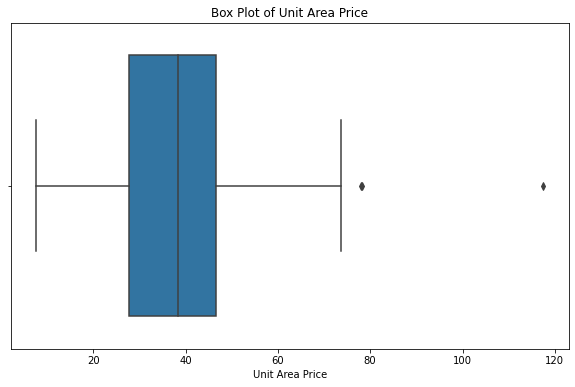

In [33]:
# Import necessary library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot size for clarity
plt.figure(figsize=(10, 6))

# Plot the box plot to visualize outliers in 'Unit_Area_Price'
sns.boxplot(x=df['Unit_Area_Price'])

# Add title for context
plt.title('Box Plot of Unit Area Price')
plt.xlabel('Unit Area Price')

# Show the plot
plt.show()